In [2]:
import pandas as pd

# Relativní cesta k souboru (podsložka Data)
excel_path = r"Rocni_zprava_2025_V0_odchylky.xlsx"
sheet_name = "Odchylky"

# Načtení celého listu bez hlaviček
odchylky = pd.read_excel(excel_path, sheet_name=sheet_name, header=None)

# Výřez buněk A6:M12417
df_odchylky = odchylky.iloc[5:32070, 0:17]

# První řádek výřezu jako hlavička
df_odchylky.columns = df_odchylky.iloc[0]
df_odchylky = df_odchylky[1:].reset_index(drop=True)

print(df_odchylky.head())
df_odchylky = df_odchylky.dropna()

# P?evod v?ech sloupc? od 4. na float
numeric_cols = df_odchylky.columns[3:]
df_odchylky[numeric_cols] = df_odchylky[numeric_cols].apply(
    pd.to_numeric, errors="coerce"
)



df_odchylky

5                  Den Perioda Časový interval Systémová odchylka (MWh)  \
0  2025-01-01 00:00:00       1     00:00-00:15                -36.39421   
1  2025-01-01 00:00:00       2     00:15-00:30                -45.56165   
2  2025-01-01 00:00:00       3     00:30-00:45                -69.01789   
3  2025-01-01 00:00:00       4     00:45-01:00                -48.27436   
4  2025-01-01 00:00:00       5     01:00-01:15                -74.79573   

5 Součet abs. hodnot odchylek (MWh) Kladné odchylky (MWh)  \
0                         147.83633              55.72106   
1                         151.76931              53.10383   
2                         134.68797              32.83504   
3                         175.63586              63.68075   
4                         163.69687              44.45057   

5 Záporné odchylky (MWh) Zaokrouhlení odchylek (MWh) Náklady na RE (Kč)  \
0              -92.11527                    -0.07079          252379.54   
1              -98.66548        

5,Den,Perioda,Časový interval,Systémová odchylka (MWh),Součet abs. hodnot odchylek (MWh),Kladné odchylky (MWh),Záporné odchylky (MWh),Zaokrouhlení odchylek (MWh),Náklady na RE (Kč),Náklady na odchylky (Kč),Zúčtovací cena odchylky\n(Kč/MWh),Zúčtovací cena protiodchylky (Kč/MWh),Cena dle ochranné komponenty RE (Kč/MWh),Cena dle komponenty RE (Kč/MWh),Cena dle komponenty VDT \n(Kč/MWh),Cena dle komponenty SO \n(Kč/MWh),Cena neuskutečněné aktivace \n(Kč/MWh)
0,2025-01-01 00:00:00,1,00:00-00:15,-36.39421,147.83633,55.72106,-92.11527,-0.07079,252379.54,-259905.61,7141.40,7141.40,6934.60,7122.57,4408.73,7141.40,1385.18
1,2025-01-01 00:00:00,2,00:15-00:30,-45.56165,151.76931,53.10383,-98.66548,-0.08435,554706.50,-592828.59,13011.57,13011.57,12174.85,12760.99,4009.94,13011.57,1385.18
2,2025-01-01 00:00:00,3,00:30-00:45,-69.01789,134.68797,32.83504,-101.85293,-0.07311,875401.12,-900833.92,13052.18,13052.18,12683.68,12737.06,3700.50,13052.18,1385.18
3,2025-01-01 00:00:00,4,00:45-01:00,-48.27436,175.63586,63.68075,-111.95511,-0.06964,504615.87,-512761.56,10621.82,10621.82,10453.08,10356.32,3342.14,10621.82,2002.21
4,2025-01-01 00:00:00,5,01:00-01:15,-74.79573,163.69687,44.45057,-119.24630,-0.07627,3812386.47,-3812386.22,50970.64,50970.64,50970.64,74212.39,3218.41,74623.76,2002.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523,2025-11-14 00:00:00,92,22:45-23:00,-11.38829,66.37771,27.49471,-38.88300,-0.10771,42206.09,-43678.08,3835.35,3835.35,3706.09,3835.35,2663.13,3727.78,2348.37
30524,2025-11-14 00:00:00,93,23:00-23:15,-14.37125,93.98299,39.80587,-54.17712,-0.13275,66044.24,-66570.65,4632.21,4632.21,4595.58,4553.17,2762.35,4632.21,2348.37
30525,2025-11-14 00:00:00,94,23:15-23:30,-3.64070,82.51812,39.43871,-43.07941,-0.13230,13812.66,-12113.52,3327.25,3327.25,3768.08,3307.09,2556.76,3327.25,2348.37
30526,2025-11-14 00:00:00,95,23:30-23:45,-1.32472,74.71054,36.69291,-38.01763,-0.11728,6618.82,-4213.90,3180.97,3180.97,4996.39,3173.69,2463.02,3180.97,2348.37


In [6]:
import pandas as pd

# 1. Přejmenování sloupce 'Den' na 'Date'
df_odchylky.rename(columns={'Den': 'Date'}, inplace=True)

# 2. Převedení 'Date' na datum bez času
df_odchylky['Date'] = pd.to_datetime(df_odchylky['Date']).dt.date

# 3. Převod 'Časový interval' na string
df_odchylky['Časový interval'] = df_odchylky['Časový interval'].astype(str)

# 4. Získání koncového času
df_odchylky['Čas_konec'] = df_odchylky['Časový interval'].str.split('-').str[1]

# 5. Nahrazení '24:00' za '00:00'
df_odchylky['Čas_konec'] = df_odchylky['Čas_konec'].replace('24:00', '00:00')

# 6. Spojení data a času do datetime
df_odchylky['Date'] = pd.to_datetime(df_odchylky['Date'].astype(str) + ' ' + df_odchylky['Čas_konec'], errors='coerce')

# 7. Odstranění pomocného sloupce
df_odchylky.drop(columns='Čas_konec', inplace=True)
df_odchylky

5,Date,Perioda,Časový interval,Systémová odchylka (MWh),Součet abs. hodnot odchylek (MWh),Kladné odchylky (MWh),Záporné odchylky (MWh),Zaokrouhlení odchylek (MWh),Náklady na RE (Kč),Náklady na odchylky (Kč),Zúčtovací cena odchylky\n(Kč/MWh),Zúčtovací cena protiodchylky (Kč/MWh),Cena dle ochranné komponenty RE (Kč/MWh),Cena dle komponenty RE (Kč/MWh),Cena dle komponenty VDT \n(Kč/MWh),Cena dle komponenty SO \n(Kč/MWh),Cena neuskutečněné aktivace \n(Kč/MWh)
0,2025-01-01 00:15:00,1,00:00-00:15,-36.39421,147.83633,55.72106,-92.11527,-0.07079,252379.54,-259905.61,7141.40,7141.40,6934.60,7122.57,4408.73,7141.40,1385.18
1,2025-01-01 00:30:00,2,00:15-00:30,-45.56165,151.76931,53.10383,-98.66548,-0.08435,554706.50,-592828.59,13011.57,13011.57,12174.85,12760.99,4009.94,13011.57,1385.18
2,2025-01-01 00:45:00,3,00:30-00:45,-69.01789,134.68797,32.83504,-101.85293,-0.07311,875401.12,-900833.92,13052.18,13052.18,12683.68,12737.06,3700.50,13052.18,1385.18
3,2025-01-01 01:00:00,4,00:45-01:00,-48.27436,175.63586,63.68075,-111.95511,-0.06964,504615.87,-512761.56,10621.82,10621.82,10453.08,10356.32,3342.14,10621.82,2002.21
4,2025-01-01 01:15:00,5,01:00-01:15,-74.79573,163.69687,44.45057,-119.24630,-0.07627,3812386.47,-3812386.22,50970.64,50970.64,50970.64,74212.39,3218.41,74623.76,2002.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30523,2025-11-14 23:00:00,92,22:45-23:00,-11.38829,66.37771,27.49471,-38.88300,-0.10771,42206.09,-43678.08,3835.35,3835.35,3706.09,3835.35,2663.13,3727.78,2348.37
30524,2025-11-14 23:15:00,93,23:00-23:15,-14.37125,93.98299,39.80587,-54.17712,-0.13275,66044.24,-66570.65,4632.21,4632.21,4595.58,4553.17,2762.35,4632.21,2348.37
30525,2025-11-14 23:30:00,94,23:15-23:30,-3.64070,82.51812,39.43871,-43.07941,-0.13230,13812.66,-12113.52,3327.25,3327.25,3768.08,3307.09,2556.76,3327.25,2348.37
30526,2025-11-14 23:45:00,95,23:30-23:45,-1.32472,74.71054,36.69291,-38.01763,-0.11728,6618.82,-4213.90,3180.97,3180.97,4996.39,3173.69,2463.02,3180.97,2348.37


In [7]:
# Výběr sloupce pro analýzu
odchylky = df_odchylky['Systémová odchylka (MWh)']

# Základní statistiky
print("📈 Základní statistiky pro 'Systémová odchylka (MWh)':\n")
print(odchylky.describe())

# Další doplňující statistiky
print("\n📉 Další statistiky:")
print(f"Počet nulových hodnot: {odchylky.isna().sum()}")
print(f"Počet kladných hodnot: {(odchylky > 0).sum()}")
print(f"Počet záporných hodnot: {(odchylky < 0).sum()}")
print(f"Počet nul: {(odchylky == 0).sum()}")
print(f"Rozsah (max - min): {odchylky.max() - odchylky.min():.2f} MWh")


📈 Základní statistiky pro 'Systémová odchylka (MWh)':

count    30467.000000
mean        -5.616588
std         20.960526
min       -199.309690
25%        -17.298625
50%         -5.915800
75%          5.917760
max        125.654140
Name: Systémová odchylka (MWh), dtype: float64

📉 Další statistiky:
Počet nulových hodnot: 48
Počet kladných hodnot: 11036
Počet záporných hodnot: 19431
Počet nul: 0
Rozsah (max - min): 324.96 MWh


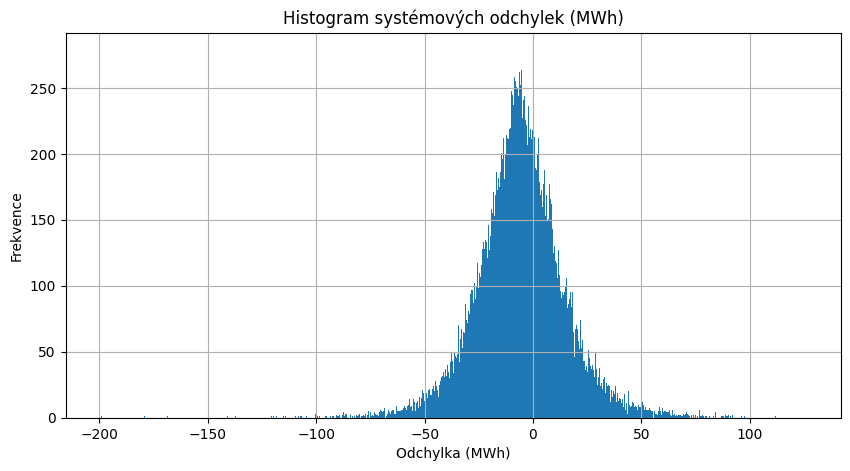

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Výběr analyzovaného sloupce
odchylky = df_odchylky['Systémová odchylka (MWh)']

# --- 1. VIZUALIZACE ---
plt.figure(figsize=(10, 5))
plt.hist(odchylky, bins=1000)
plt.title('Histogram systémových odchylek (MWh)')
plt.xlabel('Odchylka (MWh)')
plt.ylabel('Frekvence')
plt.grid(True)
plt.show()



📌 Počet outlierů (IQR metoda): 1165

Top 5 nejvyšších hodnot:
28555    125.65414
9370     111.92474
11683    101.40997
9369      98.33487
14551     97.63825
Name: Systémová odchylka (MWh), dtype: float64

Top 5 nejnižších hodnot:
21785   -199.30969
21784   -179.40890
89      -178.17204
21783   -168.69341
90      -167.94944
Name: Systémová odchylka (MWh), dtype: float64
📊 Nejvíce outlierů je v periodě: 41 (16 výskytů)


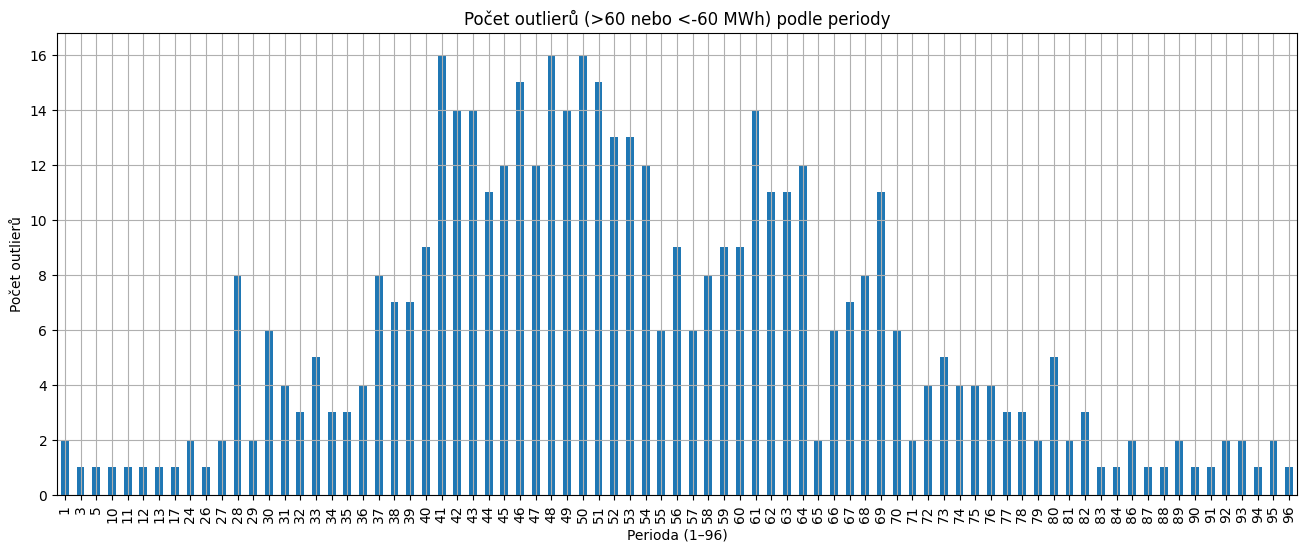

In [20]:
# --- 2. DETEKCE OUTLIERS ---
Q1 = odchylky.quantile(0.25)
Q3 = odchylky.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliery
outliers = df_odchylky[(odchylky < lower_bound) | (odchylky > upper_bound)]
print(f"📌 Počet outlierů (IQR metoda): {len(outliers)}")

# Volitelně: zobrazit pár největších a nejmenších
print("\nTop 5 nejvyšších hodnot:")
print(odchylky.sort_values(ascending=False).head())

print("\nTop 5 nejnižších hodnot:")
print(odchylky.sort_values().head())


# Definice outlierů podle vlastní podmínky
outlier_mask = (df_odchylky['Systémová odchylka (MWh)'] > 60) | \
               (df_odchylky['Systémová odchylka (MWh)'] < -60)

# Výběr jen outlierů
outliers_custom = df_odchylky[outlier_mask]

# Spočítat kolik outlierů je v každé periodě
outliers_by_period = outliers_custom['Perioda'].value_counts().sort_index()

# Výpis periody s nejvyšším počtem outlierů
max_period = outliers_by_period.idxmax()
max_count = outliers_by_period.max()

print(f"📊 Nejvíce outlierů je v periodě: {max_period} ({max_count} výskytů)")

# Volitelně: zobrazit počet outlierů pro všechny periody
import matplotlib.pyplot as plt

plt.figure(figsize=(16  , 6))
outliers_by_period.plot(kind='bar')
plt.title('Počet outlierů (>60 nebo <-60 MWh) podle periody')
plt.xlabel('Perioda (1–96)')
plt.ylabel('Počet outlierů')
plt.grid(True)
plt.show()


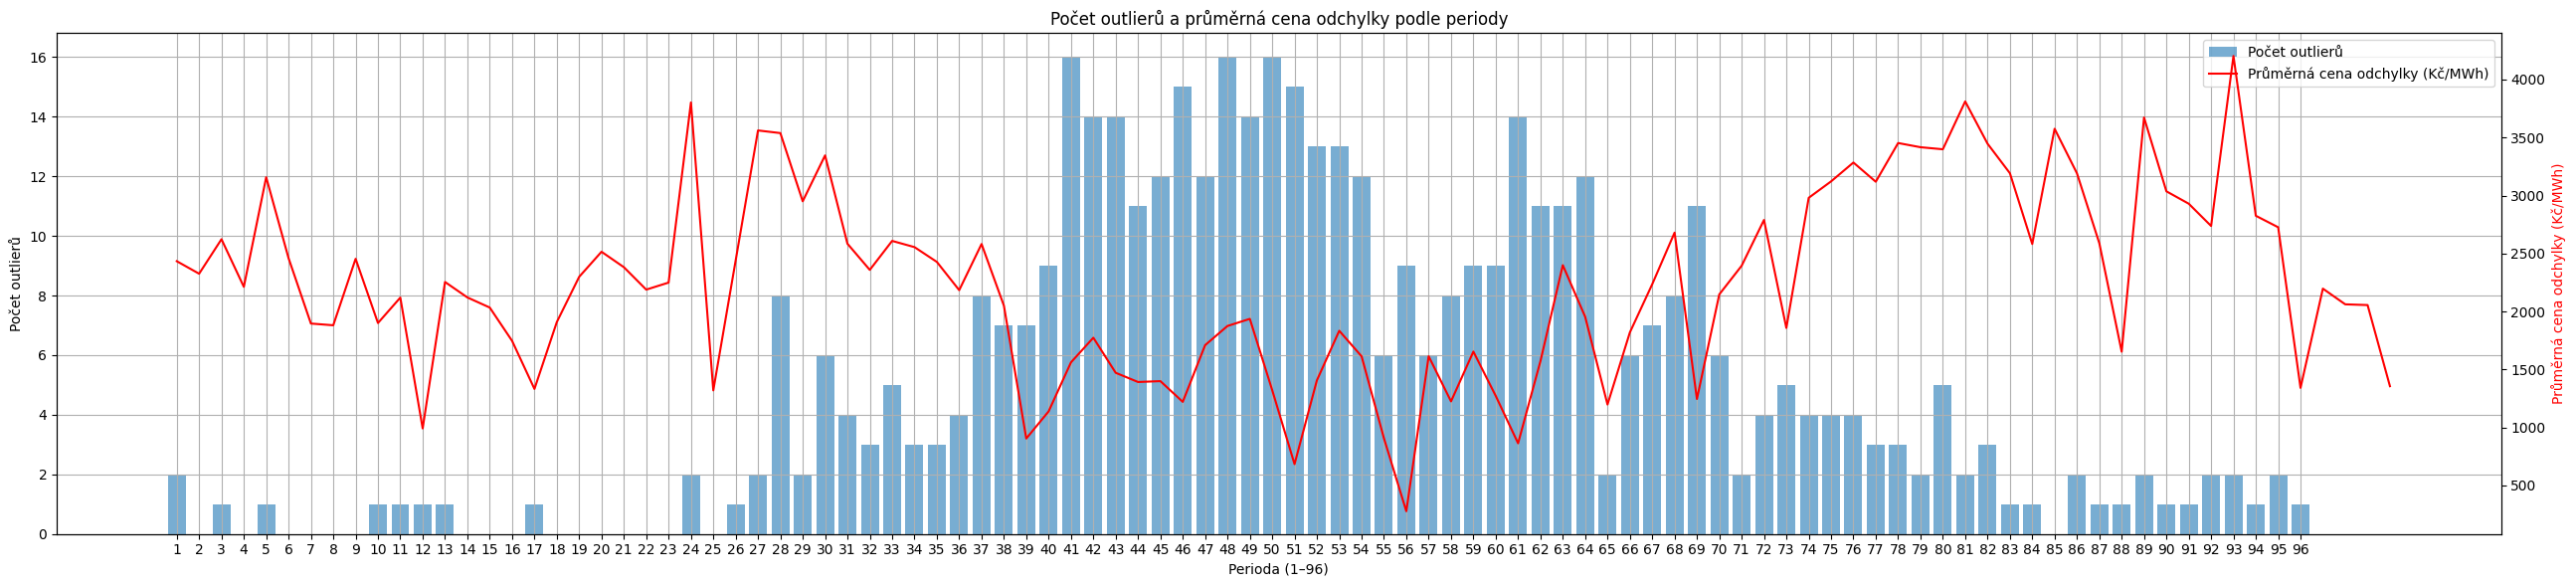

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Filtrujeme outliery podle definice (>60 nebo <-60 MWh)
outlier_mask = (df_odchylky['Systémová odchylka (MWh)'] > 60) | \
               (df_odchylky['Systémová odchylka (MWh)'] < -60)
outliers = df_odchylky[outlier_mask]

# 2. Počet outlierů podle periody
outlier_counts = outliers['Perioda'].value_counts().sort_index()

# 3. Průměrná cena odchylky podle periody (z celého datasetu)
avg_price_by_period = df_odchylky.groupby('Perioda')['Zúčtovací cena odchylky\n(Kč/MWh)'].mean()


# 4. Vykreslení kombinovaného grafu
fig, ax1 = plt.subplots(figsize=(26, 6))

# Sloupcový graf – počet outlierů
ax1.bar(outlier_counts.index, outlier_counts.values, label='Počet outlierů', alpha=0.6)
ax1.set_xlabel('Perioda (1–96)')
ax1.set_ylabel('Počet outlierů')
ax1.set_title('Počet outlierů a průměrná cena odchylky podle periody')
ax1.grid(True)

# Osa X – zajistí zobrazení všech periody
ax1.set_xticks(range(1, 97))

# Druhá osa Y – průměrná cena
ax2 = ax1.twinx()
ax2.plot(avg_price_by_period.index, avg_price_by_period.values, color='red', label='Průměrná cena odchylky (Kč/MWh)')
ax2.set_ylabel('Průměrná cena odchylky (Kč/MWh)', color='red')

# Spojení legend z obou os
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()
